In [3]:
import numpy as np
import pandas as pd
import glob
from astropy.table import Table
import matplotlib.pyplot as plt
import json 
import collections
import astropy

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

from astropy.io import fits
from astropy.io import ascii

In [60]:
from astroplan.plots import plot_airmass
from astroplan import Observer
from astroplan import FixedTarget
from astroplan import (AltitudeConstraint, AirmassConstraint,
                       AtNightConstraint)
from astroplan import is_observable, is_always_observable, months_observable
observer = Observer.at_site('palomar')

In [35]:
palomar = astropy.coordinates.EarthLocation.of_site("palomar")

In [27]:
data = Table.from_pandas(pd.read_csv("apjsaca09et4_ascii.txt", delimiter = "\t"))

In [28]:
info = data["R.A.", "Decl.", "GaiaEDR3"]

In [30]:
info.to_pandas().to_csv("radecid.csv", index = False)

In [31]:
utcoffset = -7*u.hour

In [42]:
c = SkyCoord(ra = data["R.A."], dec = data["Decl."], frame="icrs", unit="deg")

In [101]:
time = Time('2023-05-06 23:30:00') - utcoffset
time_range = Time(['2023-05-06 19:00:00', '2023-05-07 07:00:00']) - utcoffset
delta_t = time_range[1] - time_range[0]
observe_time = time_range[0] + delta_t*np.linspace(0, 1, 75)

In [106]:
moon = astropy.coordinates.get_moon(time = time, location = palomar)
moon_target = FixedTarget(name = "moon", coord = moon)

In [107]:
moon_target

<FixedTarget "moon" at SkyCoord (GCRS: obstime=2023-05-07 06:30:00.000, obsgeoloc=(-4819248.42041061, -2270071.61474157, 3498863.71346867) m, obsgeovel=(165.54363848, -351.99771176, -0.36128748) m / s): (ra, dec, distance) in (deg, deg, AU) (243.79788839, -24.74988753, 0.00248987)>

In [111]:
objects = []
for i, j in zip(data["GaiaEDR3"], c):
    objects.append(FixedTarget(name = i, coord = j))
objects_np = np.asarray(objects)

In [112]:
constraints = [AirmassConstraint(3), AtNightConstraint.twilight_civil()]

In [113]:
ever_observable = is_observable(constraints, observer, objects, time_range = time_range)

In [114]:
observable = objects_np[ever_observable]

In [121]:
is_up_data = data[ever_observable]

In [123]:
is_up_data.sort("G")

In [125]:
is_up_data["GaiaEDR3", "R.A.", "Decl."]

GaiaEDR3,R.A.,Decl.
int64,float64,float64
1375814952762454272,233.45602,37.99106
3637481302758519040,204.70058,-2.03039
4078817195637328256,283.07503,-21.79744
901929564359845888,122.11083,32.04179
1877320760449993216,338.58958,24.94919
2812551023024830720,351.71862,12.50606
4102198997623267456,282.46445,-13.67621
1102107819544067456,107.67521,66.92872
4303030190905072640,294.76892,11.18227


In [127]:
is_up_data["GaiaEDR3", "R.A.", "Decl."].to_pandas().to_csv("options.csv", index = False)

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


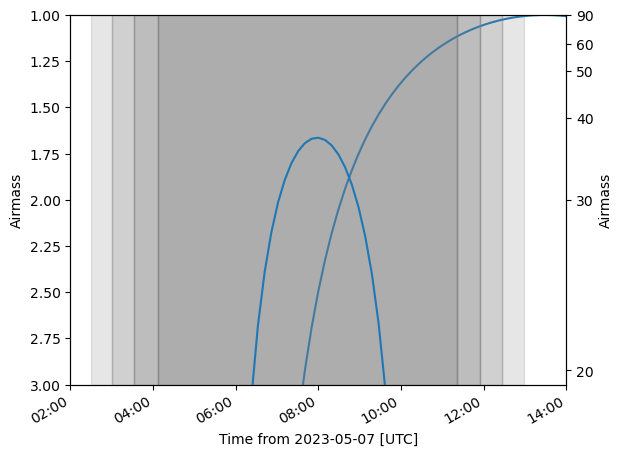

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


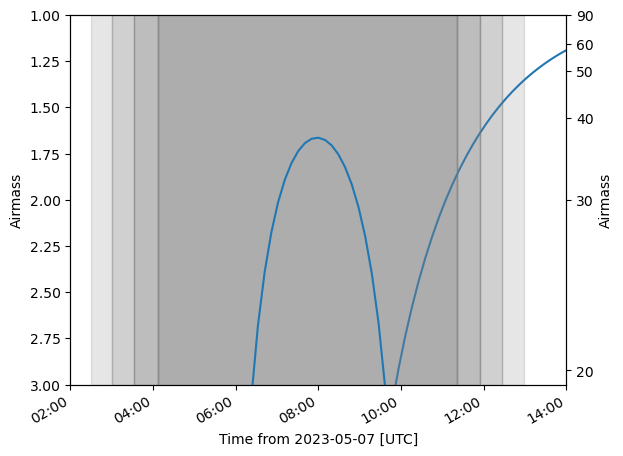

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


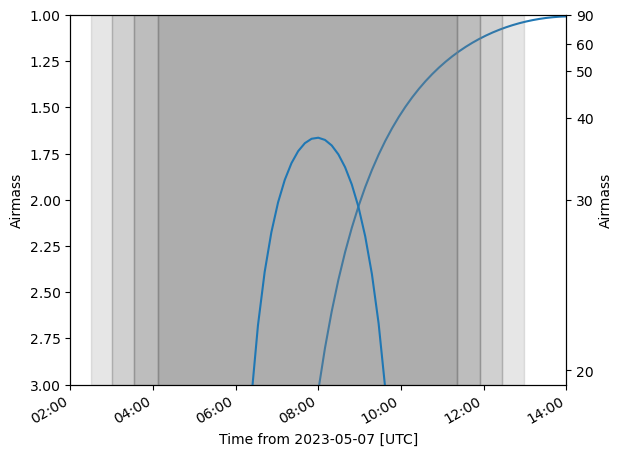

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


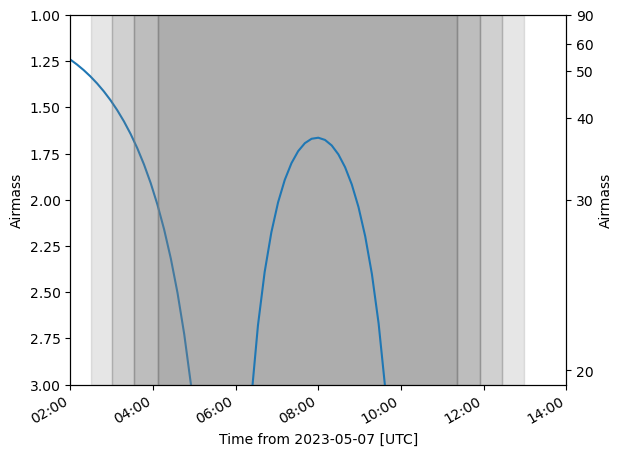

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


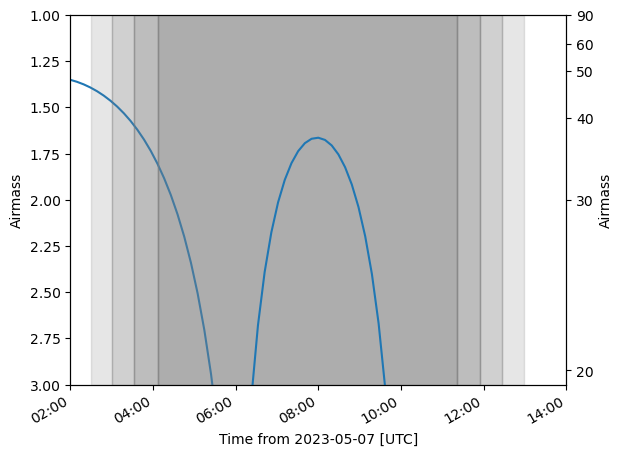

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


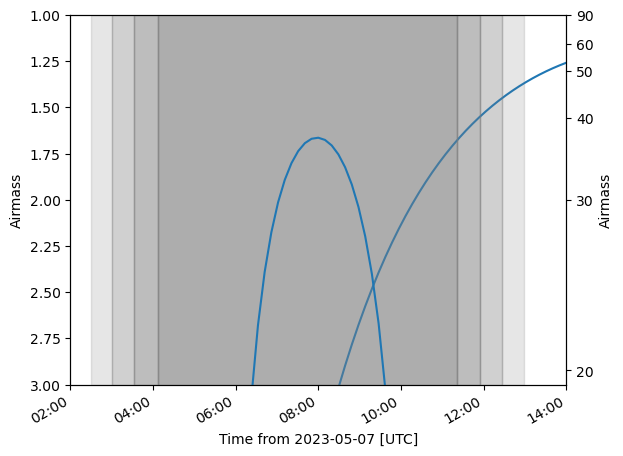

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


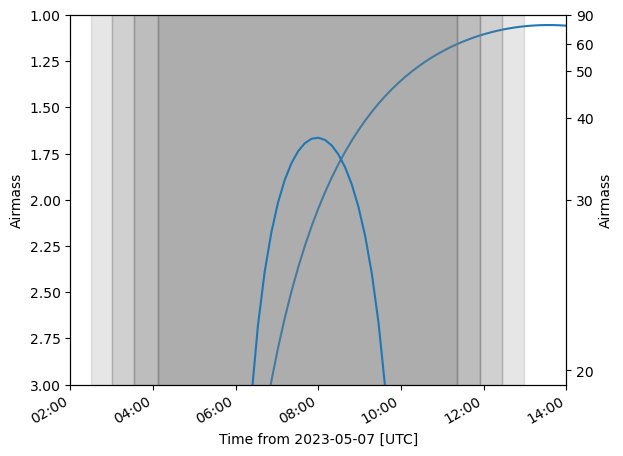

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


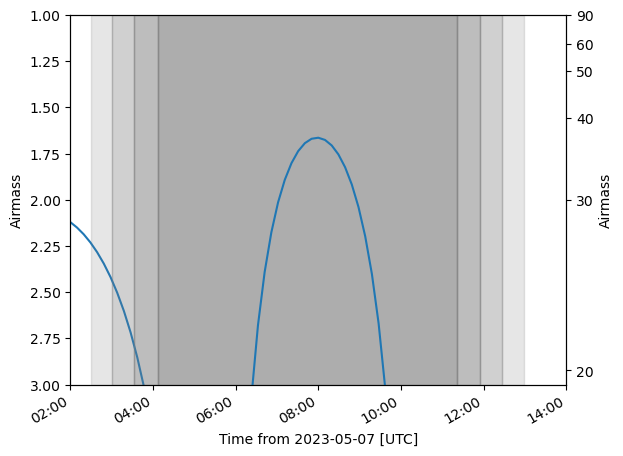

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


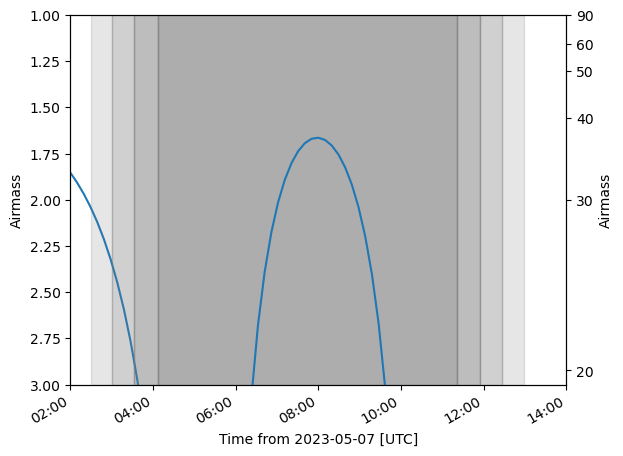

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


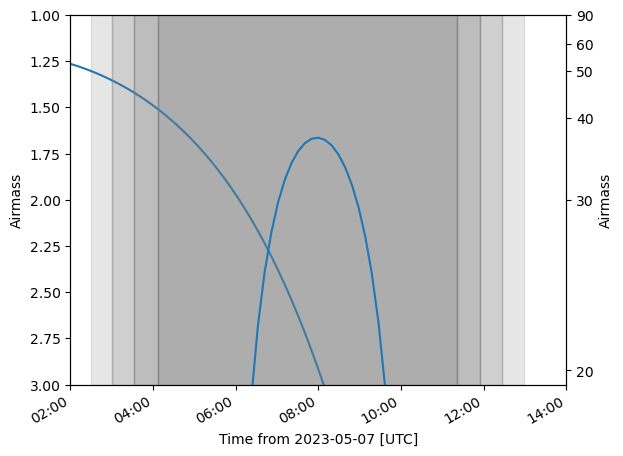

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


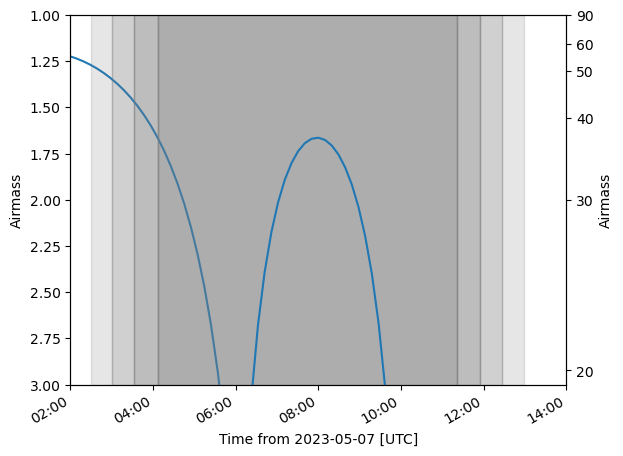

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


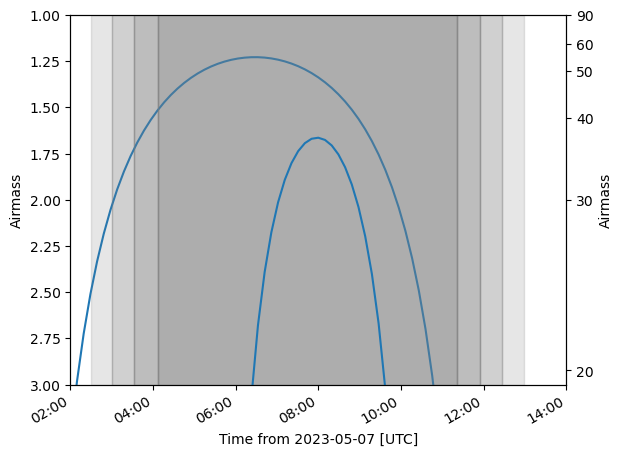

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


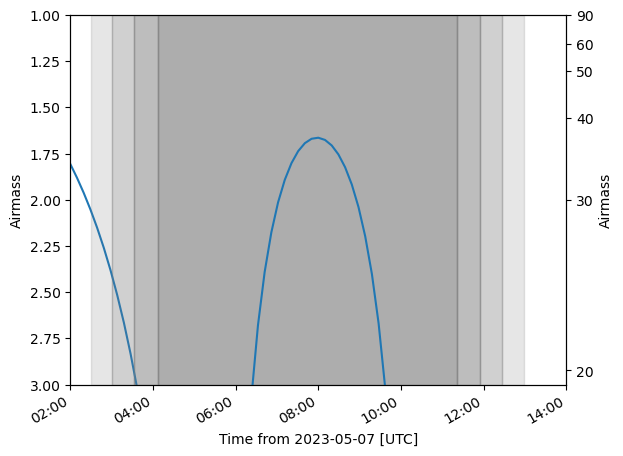

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


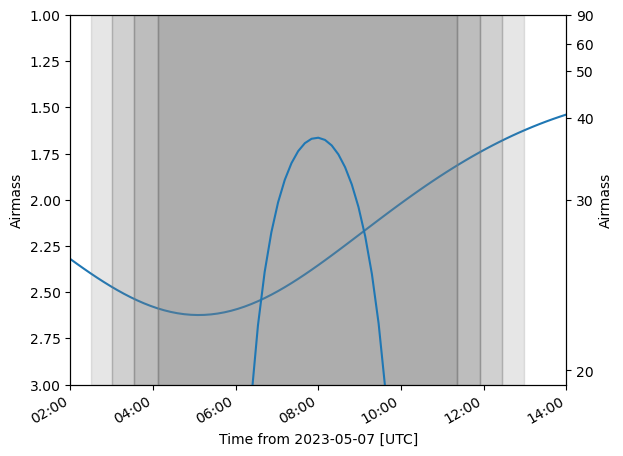

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


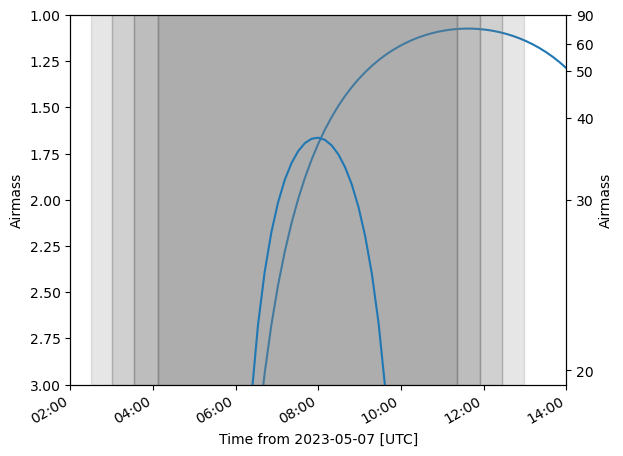

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


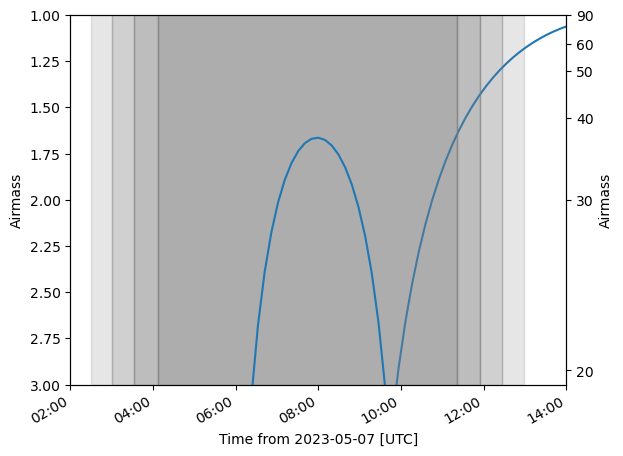

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


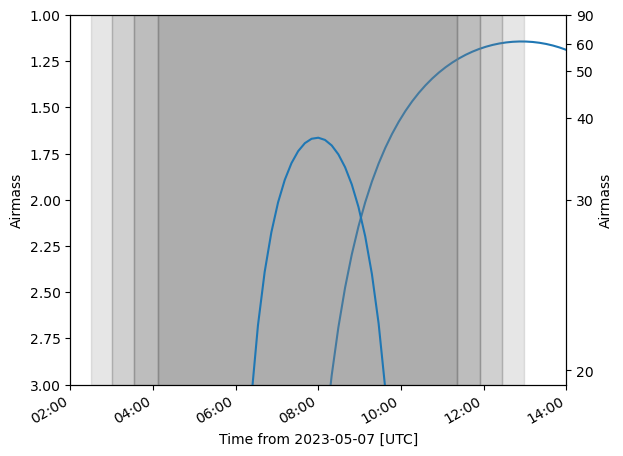

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


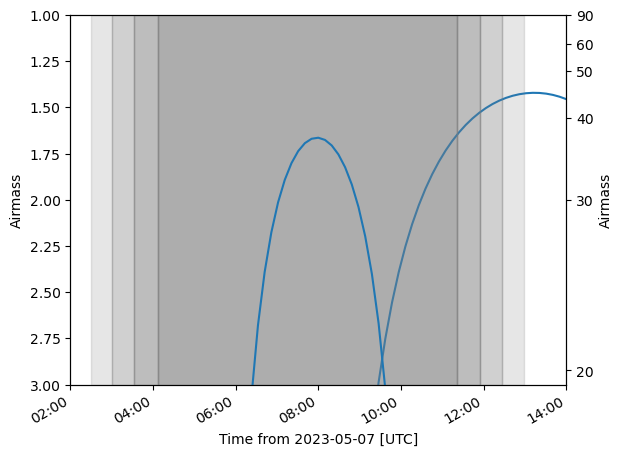

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


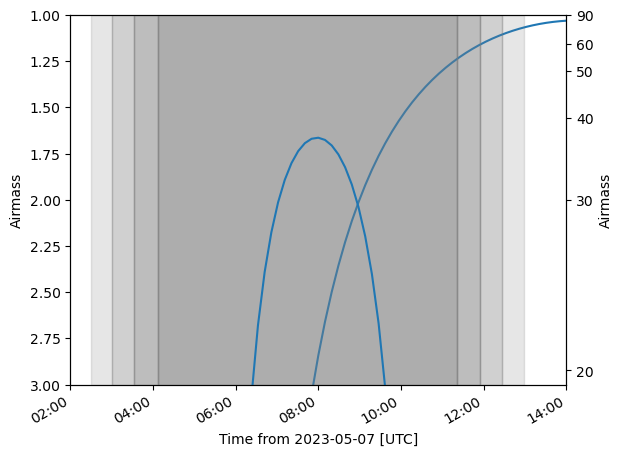

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


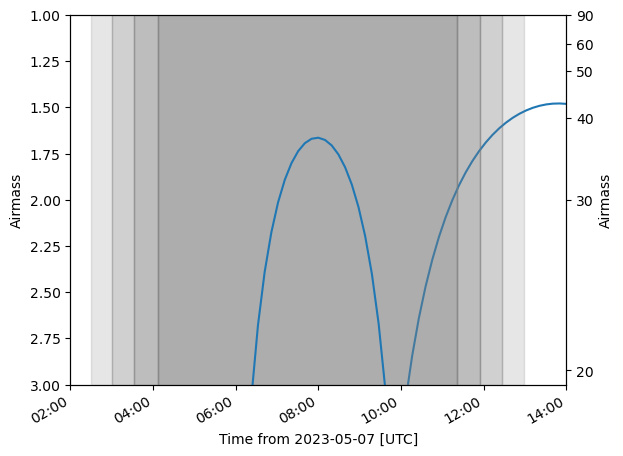

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


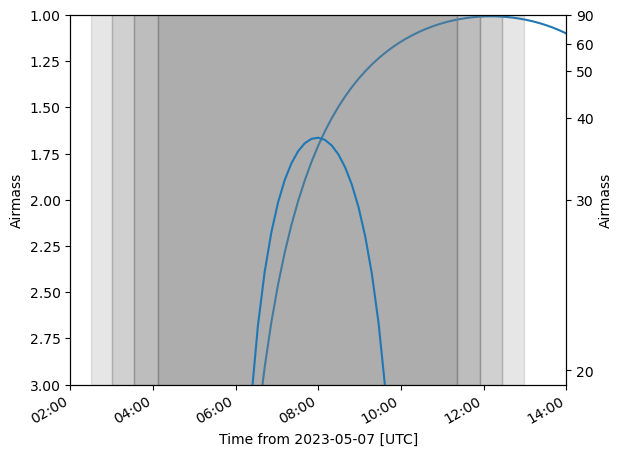

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


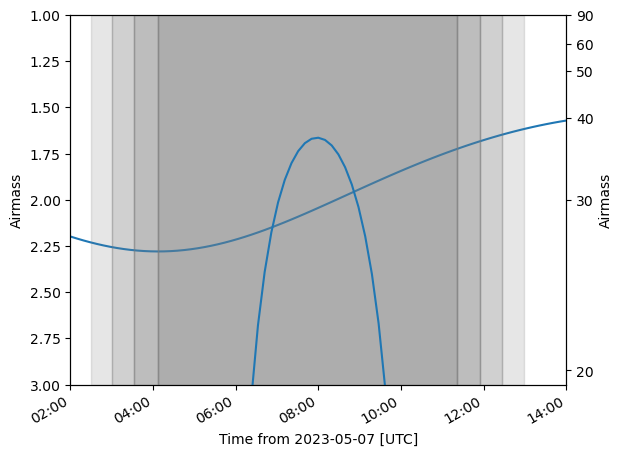

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


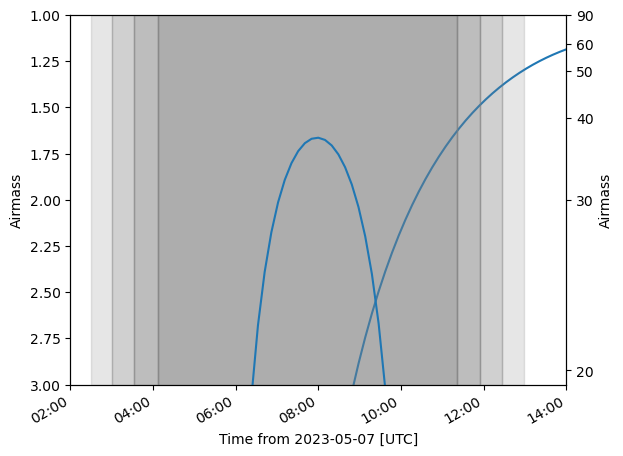

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


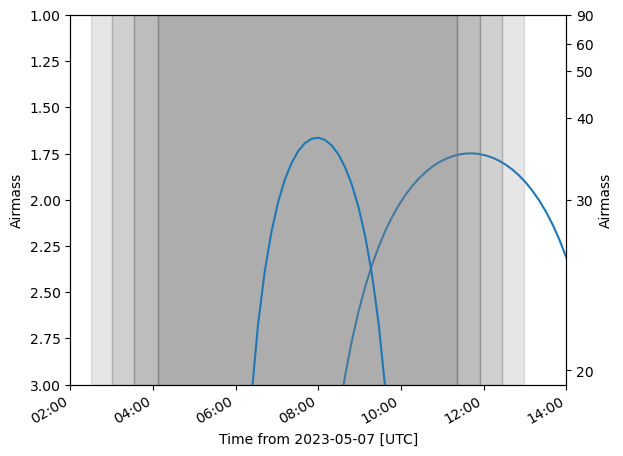

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


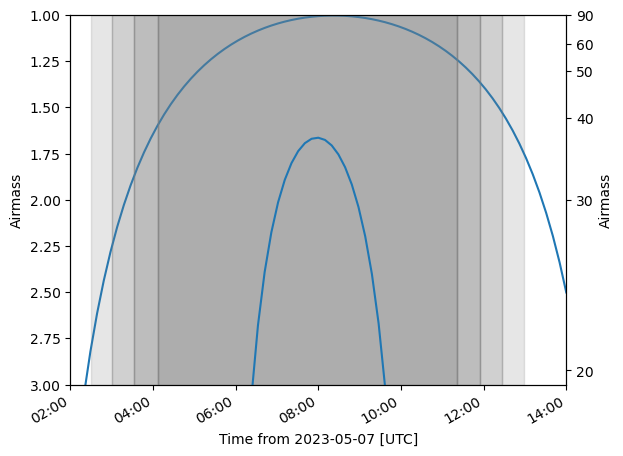

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


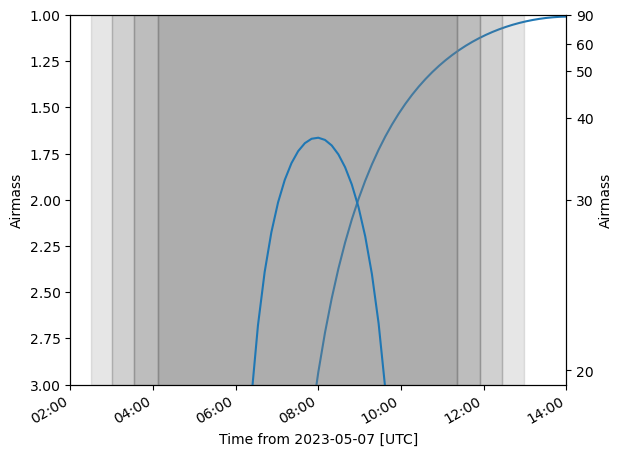

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


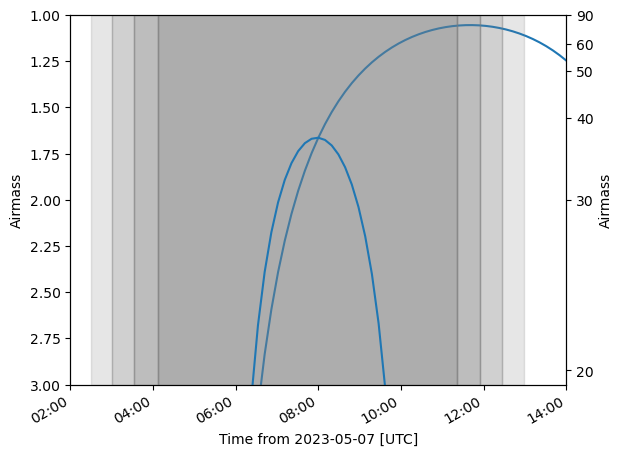

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


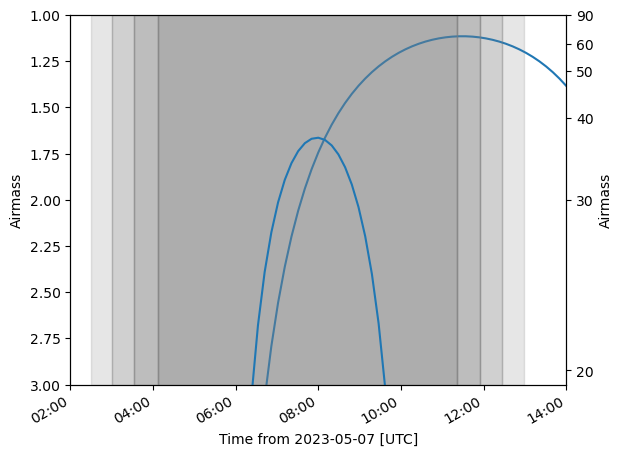

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


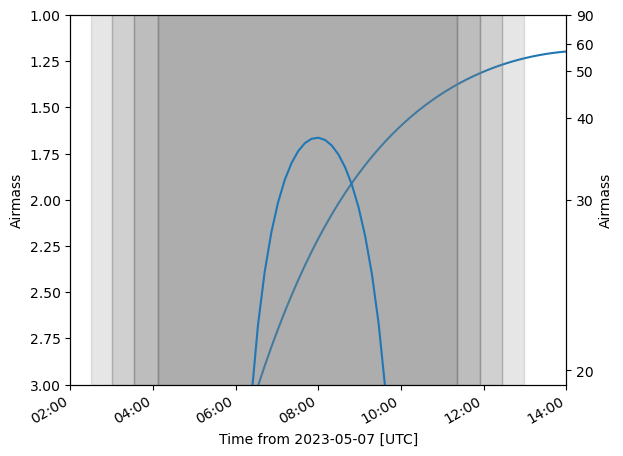

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


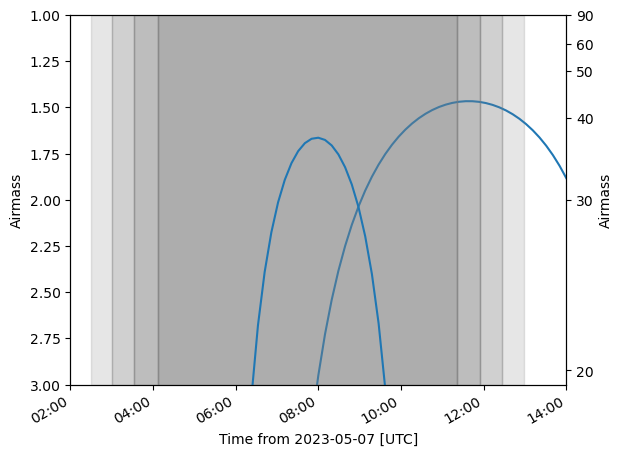

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


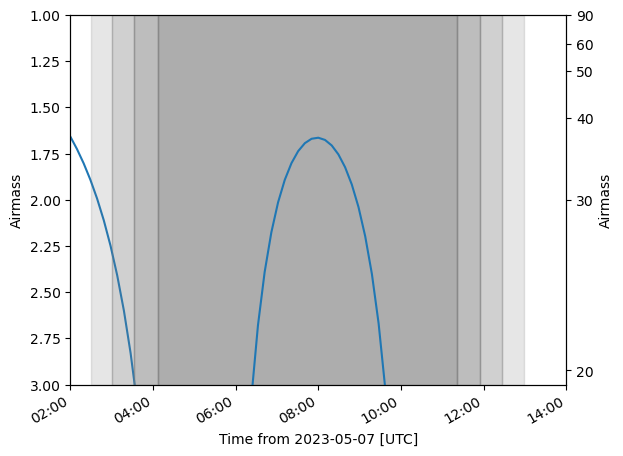

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


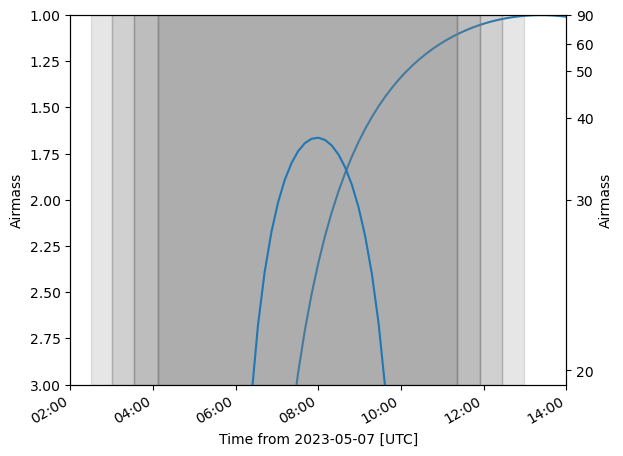

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


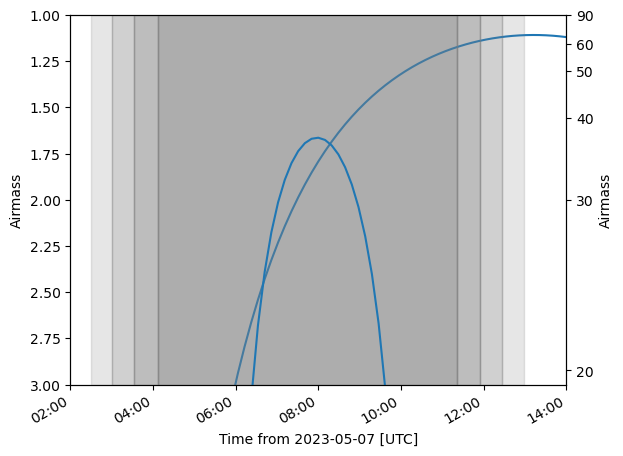

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


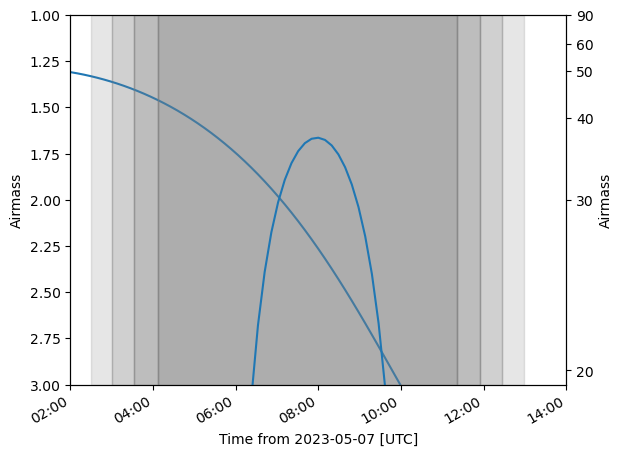

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


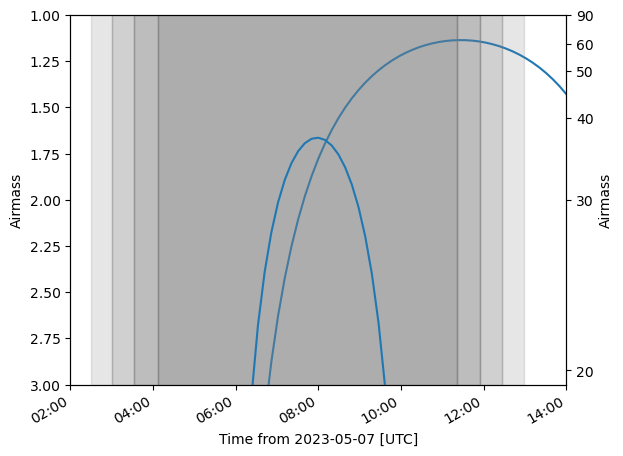

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


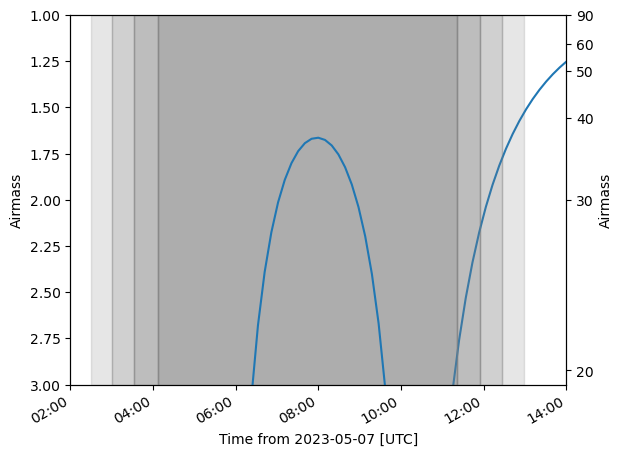

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


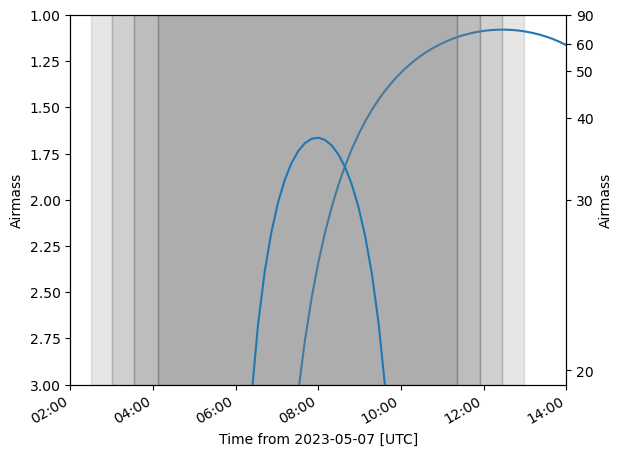

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


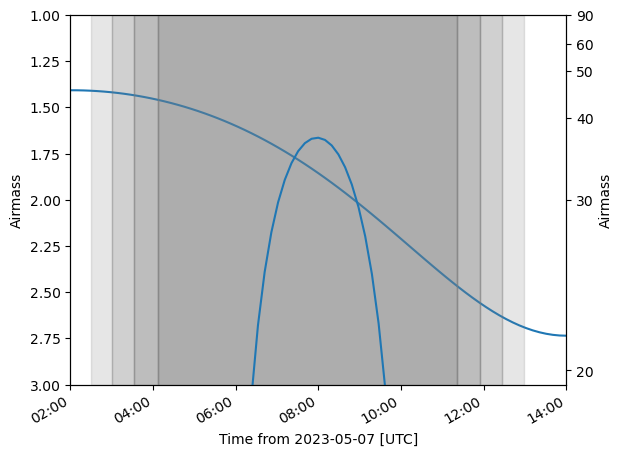

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


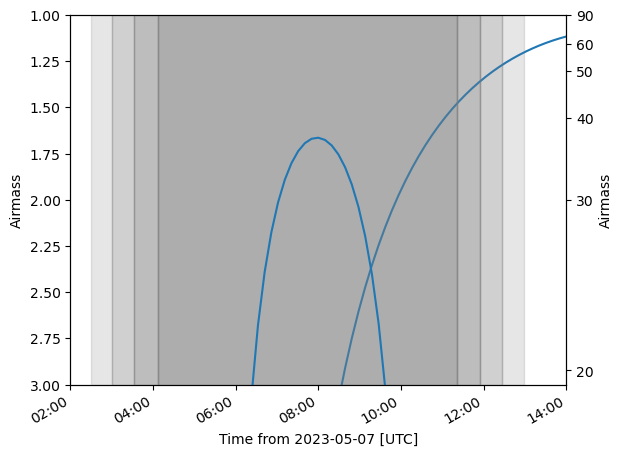

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


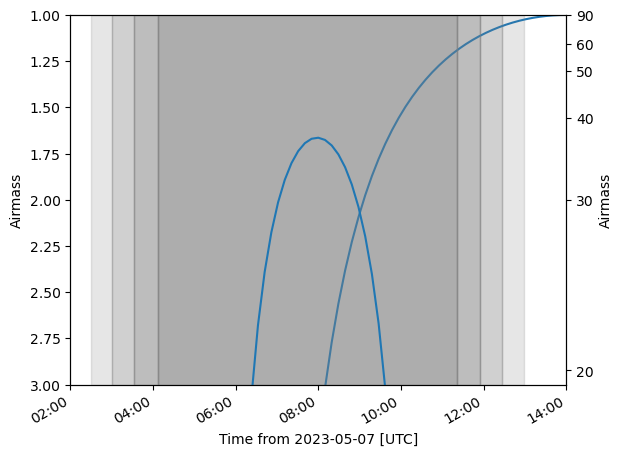

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


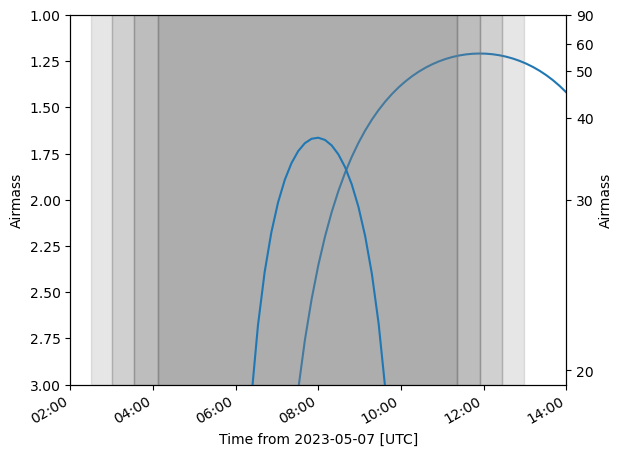

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


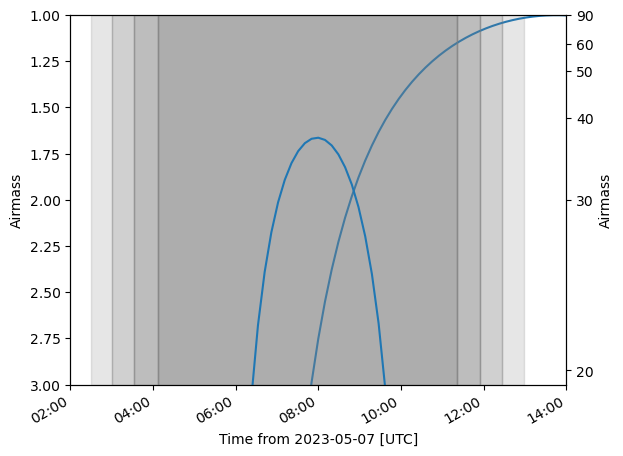

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


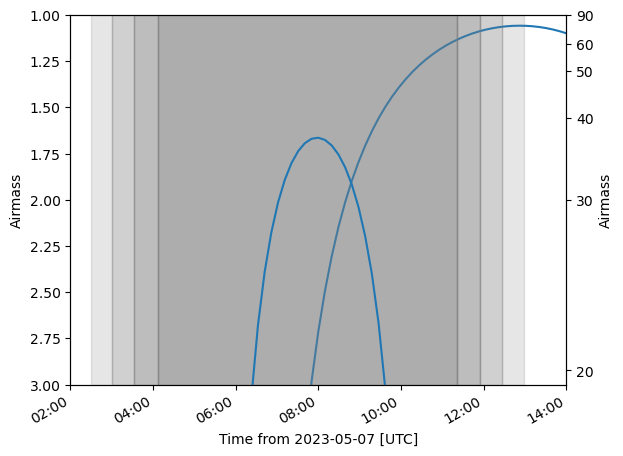

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


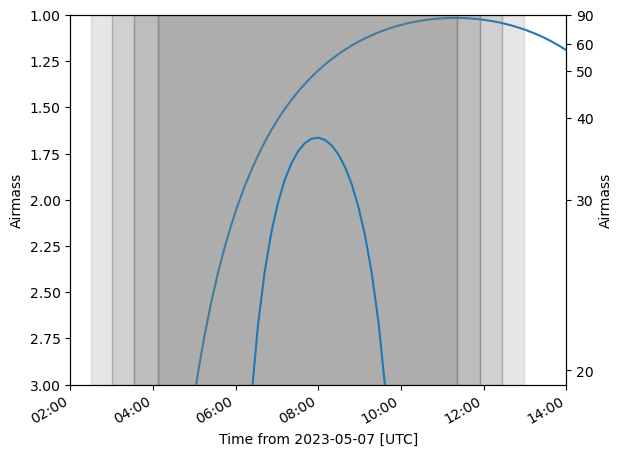

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


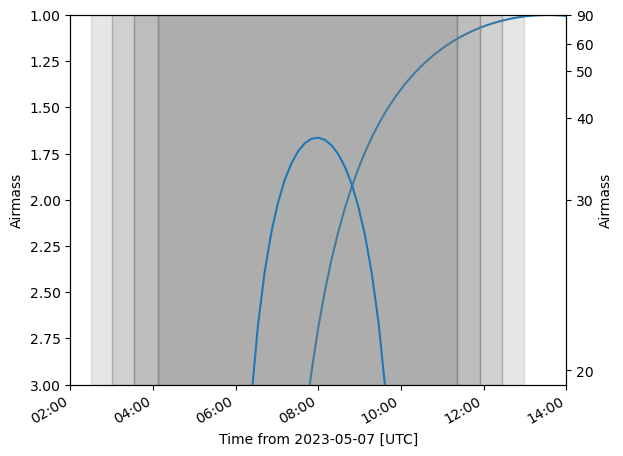

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


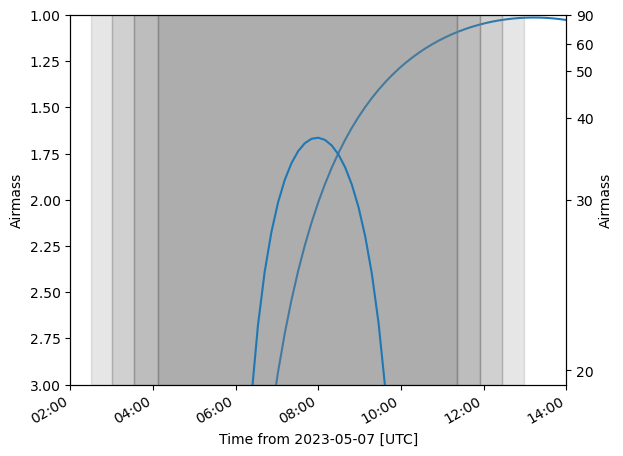

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


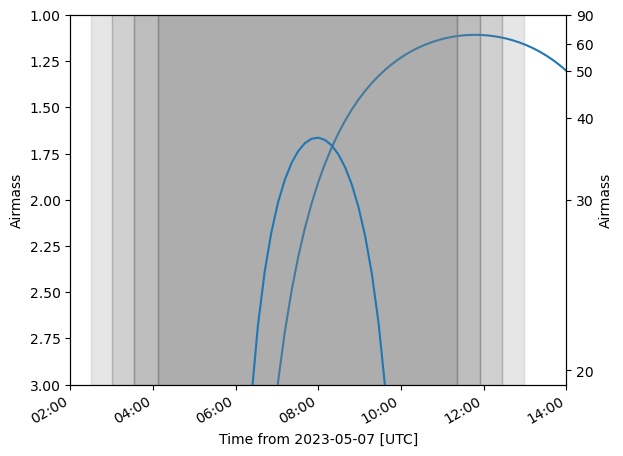

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


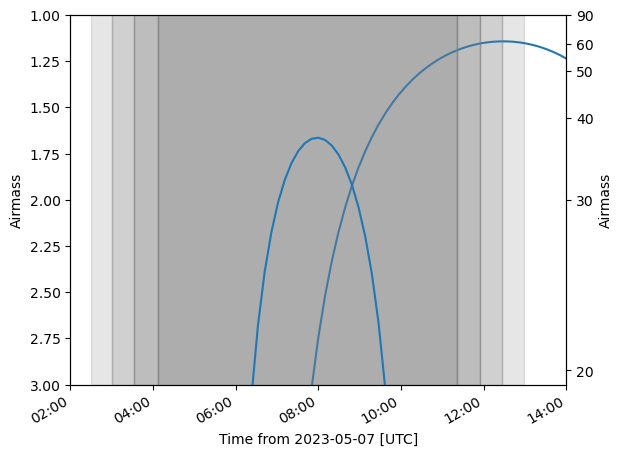

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


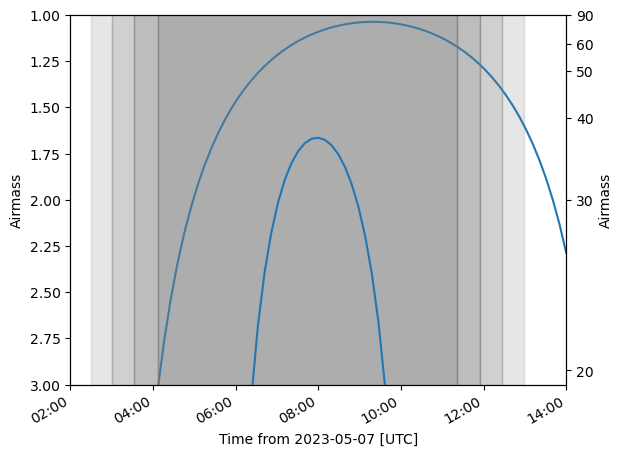

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


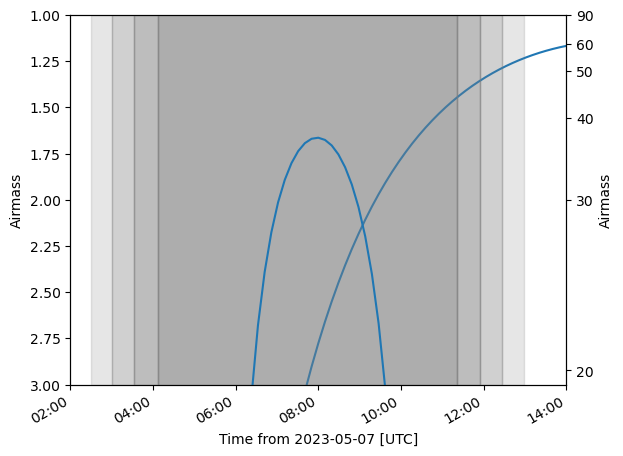

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


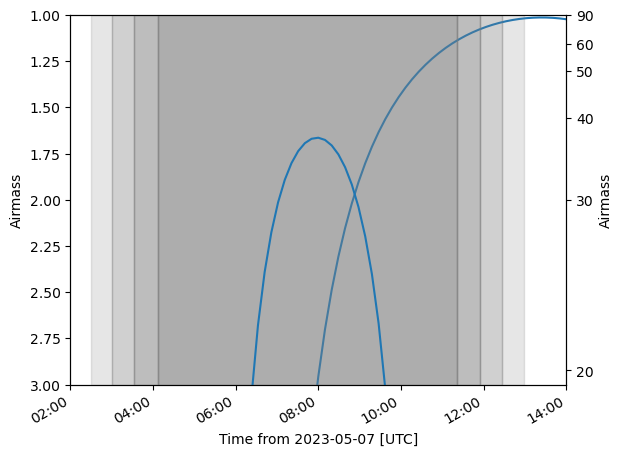

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


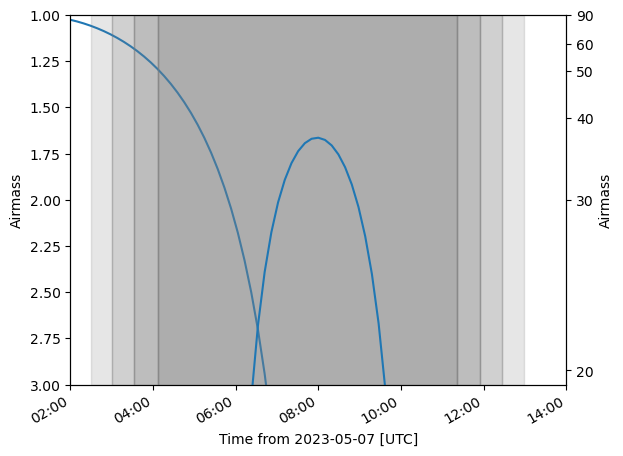

c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)
c:\Users\20xha\anaconda3\envs\ay-ge_107\lib\site-packages\astroplan\plots\time_dependent.py:194: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot_date(timetoplot.plot_date, masked_airmass, label=target_name, **style_kwargs)


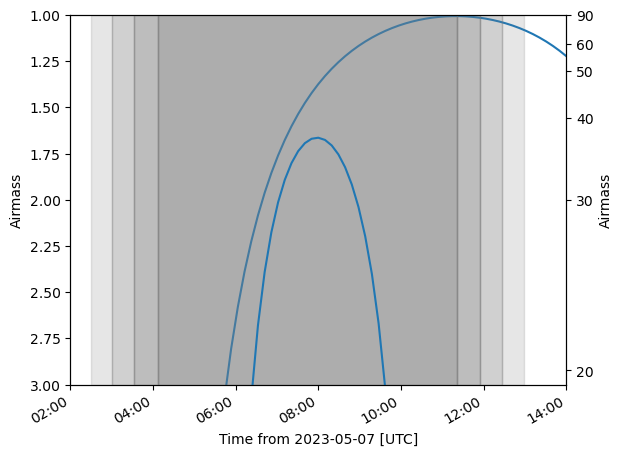

In [108]:
for i in observable:
    plot_airmass(i, observer, observe_time, brightness_shading=True, altitude_yaxis=True)
    plot_airmass(moon_target, observer, observe_time, brightness_shading=True, altitude_yaxis=True)
    plt.show()